In [1]:
import pandas as pd
from pandas import datetime

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

In [3]:
df=pd.read_csv(r"../input/total-lpg-sales-quarterly/Total LPG sales quarterly.csv",index_col=[0],parse_dates=[0],date_parser=parser)
df.head()

,value
quarter,
1994-01-01,29226.3
1994-02-01,38153.9
1994-03-01,39414.7
1994-04-01,37600.3
1995-01-01,34100.6


In [4]:
df.shape

(102, 1)

In [5]:
df.columns

Index(['value'], dtype='object')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='quarter'>

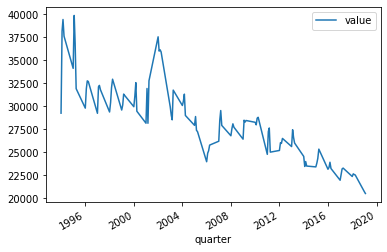

In [7]:
df.plot()

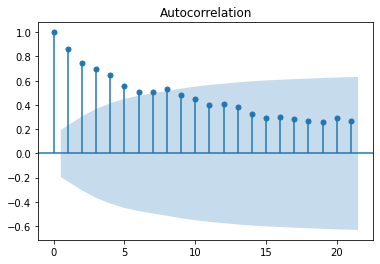

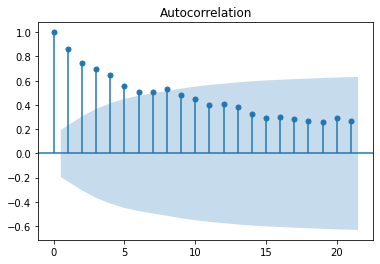

In [8]:
import statsmodels.api 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [9]:
##stationarity means mean,variance and corealation is constant over a period

In [10]:
###converting the data into stationarity

In [11]:
df.head(5)

,value
quarter,
1994-01-01,29226.3
1994-02-01,38153.9
1994-03-01,39414.7
1994-04-01,37600.3
1995-01-01,34100.6


In [12]:
df.shift(1)

,value
quarter,
1994-01-01,NaN
1994-02-01,29226.3
1994-03-01,38153.9
1994-04-01,39414.7
1995-01-01,37600.3
...,...
2018-02-01,22341.0
2018-03-01,22628.2
2018-04-01,22552.9


In [13]:
df.columns

Index(['value'], dtype='object')

In [14]:
#integrated order of one 
#denoted by d (for difference), one of the parametre of ARIMA model
difference=df.diff(periods=1)

In [15]:
difference=difference[1:]
difference.head()

,value
quarter,
1994-02-01,8927.6
1994-03-01,1260.8
1994-04-01,-1814.4
1995-01-01,-3499.7
1995-02-01,5755.3


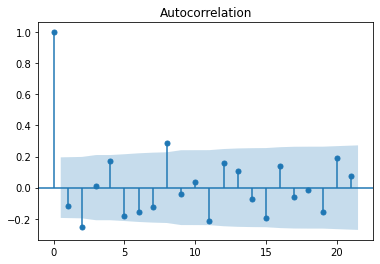

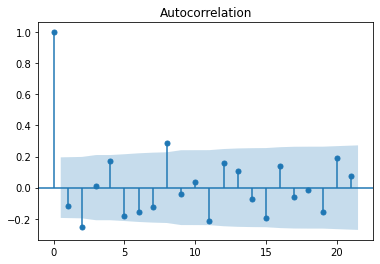

In [16]:
plot_acf(difference)

<AxesSubplot:xlabel='quarter'>

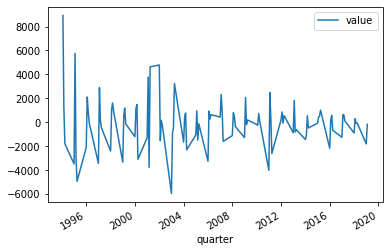

In [17]:
difference.plot()

In [18]:
import numpy as np
X = df.values
X.size

102

In [19]:
80/100 * 102

81.60000000000001

In [20]:
train=X[0:81]
test=X[81:]

In [21]:
train.size

81

In [22]:
test.size

21

In [23]:
predictions=[]

In [24]:
###AUTOREGRESSIVE MODEL (AR)

In [25]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar=AR(train)
model_ar_fit = model_ar.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


In [26]:
predictions=model_ar_fit.predict(start=81,end=102)
predictions

array([25110.14524653, 25432.60915134, 25978.72858898, 25764.03159897,
       27011.98180956, 26789.95058838, 26951.16540523, 26497.09102449,
       26677.23972531, 26509.78415711, 26892.51653284, 26825.56410531,
       27427.72139522, 27345.82811394, 27636.28793286, 27477.45384675,
       27570.85074658, 27395.90717355, 27583.57075075, 27474.44984796,
       27753.32908204, 27706.60838812])

In [27]:
test

array([[23431.7],
       [23965.3],
       [23474.8],
       [23384.8],
       [23808.7],
       [24311.7],
       [25315.1],
       [23129.9],
       [23324.9],
       [23889.9],
       [23206.6],
       [21934.5],
       [22573.1],
       [23162.8],
       [23253.4],
       [22341. ],
       [22628.2],
       [22552.9],
       [22504. ],
       [20682. ],
       [20491.9]])

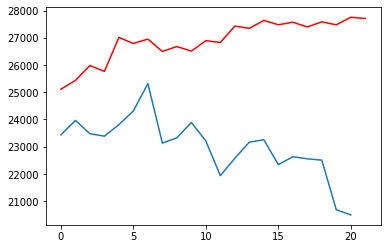

In [28]:
plt.plot(test)
plt.plot(predictions,color='red')

In [29]:
###ARIMA Model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [31]:
#p,d,q ; p=periods taken for autoregressive model
#d=order of integrated , difference
#q=periods in moving average model
model_arima=ARIMA(train,order=(10,1,0))
model_arima_fit=model_arima.fit()
print(model_arima_fit.aic)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1457.6264068877078


In [32]:
predictions= model_arima_fit.forecast(steps=21)[0]
predictions

array([24809.93953802, 24634.33541108, 24905.94557739, 24140.09049715,
       25401.59025398, 25169.19770497, 25163.49802116, 24216.7724689 ,
       24388.33177568, 23858.1213933 , 23923.13248272, 23259.99983184,
       23935.35298101, 23728.60107809, 23970.60497064, 23426.55503629,
       23617.19752599, 23114.6354974 , 23133.54202993, 22539.10501872,
       22835.23327423])

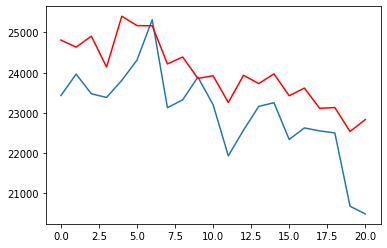

In [33]:
plt.plot(test)
plt.plot(predictions,color='red')

In [34]:
import numpy
mean_squared_error(test,predictions)

1302078.5193338846

In [35]:
import itertools
p=d=q=range(0,5)
pdq=list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [36]:
import warnings 
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 1559.9316872199333
(0, 0, 1) 1513.4805592360442
(0, 0, 2) 1498.310286483731
(0, 0, 3) 1498.0339167328025
(0, 0, 4) 1475.570074221977
(0, 1, 0) 1472.0771980117797
(0, 1, 1) 1470.1665349982516
(0, 1, 2) 1462.2303675484739
(0, 1, 3) 1460.6707161908532
(0, 1, 4) 1462.6330330339479
(0, 2, 0) 1511.0987941766716
(0, 2, 1) 1460.866280995551
(0, 2, 2) 1460.0578132084372
(0, 2, 3) 1455.2700520176004
(0, 2, 4) 1455.006467639986
(1, 0, 0) 1484.3943313306065
(1, 0, 1) 1486.3362160295305
(1, 0, 2) 1485.189775345671
(1, 0, 3) 1486.8780581237509
(1, 0, 4) 1477.5088287339402
(1, 1, 0) 1472.7341364760543
(1, 1, 1) 1459.7774955755658
(1, 1, 2) 1460.5331640140553
(1, 1, 3) 1446.0813633470693
(1, 1, 4) 1448.0635545019672
(1, 2, 0) 1498.2776192710155
(1, 2, 1) 1461.8315582554048
(1, 2, 2) 1453.7833949230314
(1, 2, 3) 1454.7326639279795
(1, 2, 4) 1440.5043910121387
(2, 0, 0) 1486.3726520157047
(2, 0, 1) 1486.3590310788966
(2, 0, 2) 1487.0171708085836
(2, 0, 3) 1472.7814807806512
(2, 0, 4) 1473.3094